In [2]:
import pandas as pd
from datetime import datetime
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns



In [3]:
file=pd.read_csv('C:/Users/memo/Desktop/Auto Sales data.csv')

In [4]:
df=pd.DataFrame(file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'],format='%d/%m/%Y')
df['STATUS']=df['STATUS'].astype('category')
df['PRODUCTLINE']=df['PRODUCTLINE'].astype('category')
df['DEALSIZE']=df['DEALSIZE'].astype('category')
df['ADDRESSLINE1']=df['ADDRESSLINE1'].str.strip()
df['CUSTOMERNAME']=df['CUSTOMERNAME'].str.strip()
df['CUSTOMERNAME']=df['CUSTOMERNAME'].str.title()
df['CONTACTFULLNAME']=df['CONTACTFIRSTNAME']+ ' ' + df['CONTACTLASTNAME']
df=df.drop(['CONTACTFIRSTNAME','CONTACTLASTNAME'],axis=1)
df['CONTACTFULLNAME']=df['CONTACTFULLNAME'].str.strip()
df['CONTACTFULLNAME']=df['CONTACTFULLNAME'].str.title()
df['MSRP']=df['MSRP'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   category      
 8   PRODUCTLINE           2747 non-null   category      
 9   MSRP                  2747 non-null   float64       
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


In [9]:
print(df.isna().sum())

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
DEALSIZE                0
CONTACTFULLNAME         0
dtype: int64


In [10]:

print(df.duplicated().sum())

0


In [11]:

print(df.isnull().sum())


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
DEALSIZE                0
CONTACTFULLNAME         0
dtype: int64


In [12]:
Q1=df['SALES'].quantile(0.25)
Q3=df['SALES'].quantile(0.75)
IQR=Q3-Q1
LowerBound=Q1-1.5*IQR
HigherBound=Q3+1.5*IQR


                        

In [13]:
df=df[(df['SALES']>=LowerBound)&(df['SALES']<=HigherBound)]

In [14]:
rfm=df.groupby('ORDERNUMBER').agg(
    {
        "DAYS_SINCE_LASTORDER":"min",
        "ORDERNUMBER":"count",
        "SALES":"sum"
    }
).rename(
    columns={
        "DAYS_SINCE_LASTORDER":"Recency",
        "ORDERNUMBER":"Frequency",
        "SALES":"Monetary"
    }
)


In [15]:
rfm.head()

,Recency,Frequency,Monetary
ORDERNUMBER,,,
10100,1429,4,12133.25
10101,1573,4,11432.34
10102,1327,2,6864.05
10103,878,16,54702.00
10104,1102,13,44621.96


In [16]:
rfm['R']=pd.qcut(rfm['Recency'],4,[1,2,3,4])
rfm['F']=pd.qcut(rfm['Frequency'],4,[4,3,2,1])
rfm['M']=pd.qcut(rfm['Monetary'],4,[4,3,2,1])

In [17]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
ORDERNUMBER,,,,,,
10100,1429,4,12133.25,4,4,4
10101,1573,4,11432.34,4,4,4
10102,1327,2,6864.05,4,4,4
10103,878,16,54702.00,3,1,1
10104,1102,13,44621.96,4,2,1


In [18]:
rfm['RFM Score']=rfm['R'].astype(str)+rfm['F'].astype(str)+rfm['M'].astype(str)

In [19]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score
ORDERNUMBER,,,,,,,
10100,1429,4,12133.25,4,4,4,444
10101,1573,4,11432.34,4,4,4,444
10102,1327,2,6864.05,4,4,4,444
10103,878,16,54702.00,3,1,1,311
10104,1102,13,44621.96,4,2,1,421


In [20]:
rfm=rfm.sort_values(by=['RFM Score','Monetary'],ascending=[True,False])

In [21]:
rfm.head()
rfm['RFM Score']=rfm['RFM Score'].astype(int)

In [22]:
rfm['Rating']=pd.qcut(rfm['RFM Score'],3,['Excellent','Good','Poor'])

In [23]:
rfm.head()


,Recency,Frequency,Monetary,R,F,M,RFM Score,Rating
ORDERNUMBER,,,,,,,,
10287,440,17,67281.01,1,1,1,111,Excellent
10310,395,16,60002.44,1,1,1,111,Excellent
10306,421,17,57827.61,1,1,1,111,Excellent
10275,326,18,56002.90,1,1,1,111,Excellent
10305,372,14,54251.66,1,1,1,111,Excellent


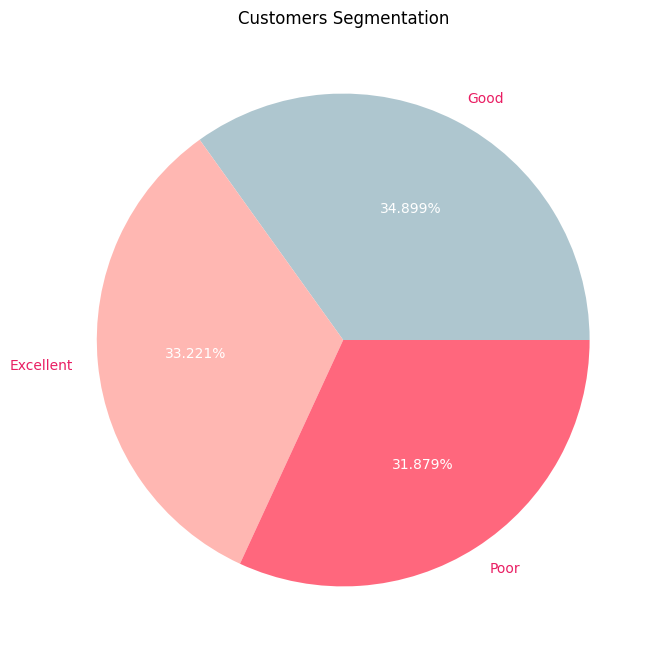

In [40]:
RatingValues=rfm['Rating'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(RatingValues,labels=RatingValues.index,autopct='%1.3f%%',colors=['#AEC6CF', '#FFB7B2', '#FF677D'],textprops={'color': '#E91E63'})
for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_color('white') 
plt.title('Customers Segmentation')
plt.show()


In [42]:
df2=df.groupby('COUNTRY').agg({
    'SALES':"sum"
}).rename(columns={'SALES':'Total Spent'}).reset_index()

df2=df2.sort_values(by=['Total Spent'], ascending=[False])
df2.head()


,COUNTRY,Total Spent
18,USA,3105982.39
14,Spain,1139908.48
6,France,991050.59
0,Australia,570371.06
17,UK,458345.22


C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\3697377379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY',y='Total Spent',data=df2,palette= 'Blues')


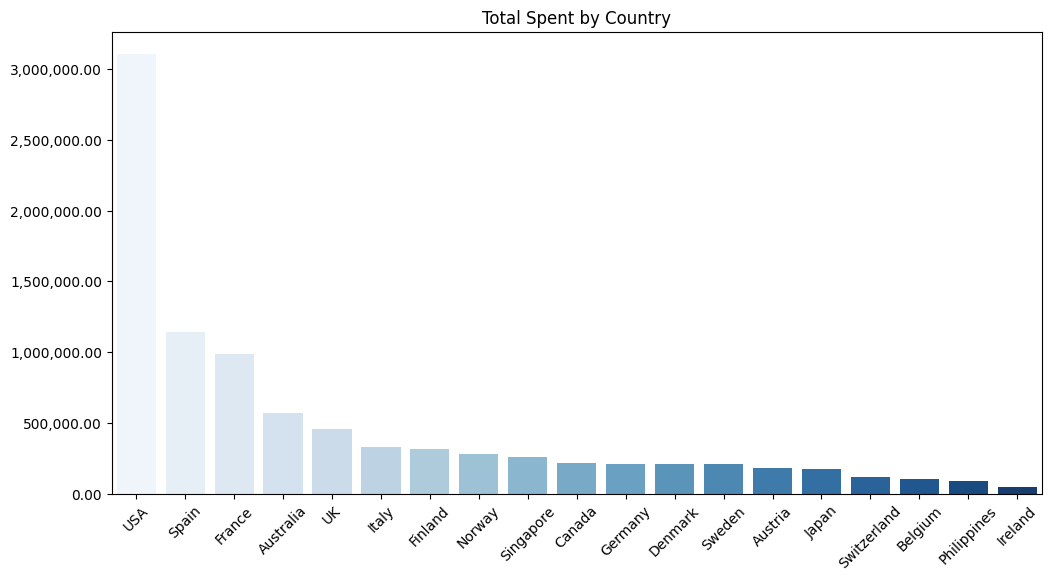

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x='COUNTRY',y='Total Spent',data=df2,palette= 'Blues')
plt.ylabel('')  
plt.xlabel('')     
formatter = FuncFormatter(lambda x, _: f'{x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Total Spent by Country') 
plt.xticks(rotation=45)
plt.show()

In [27]:
df3=df.groupby(['STATUS','PRODUCTLINE']).agg(
    {
        'STATUS':"count"
    }
).rename(
    columns={
        "STATUS":"Number"
    }
).reset_index()
df3

C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\4025701841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3=df.groupby(['STATUS','PRODUCTLINE']).agg(


,STATUS,PRODUCTLINE,Number
0,Cancelled,Classic Cars,16
1,Cancelled,Motorcycles,0
2,Cancelled,Planes,12
3,Cancelled,Ships,18
4,Cancelled,Trains,1
5,Cancelled,Trucks and Buses,0
6,Cancelled,Vintage Cars,13
7,Disputed,Classic Cars,1
8,Disputed,Motorcycles,5
9,Disputed,Planes,2


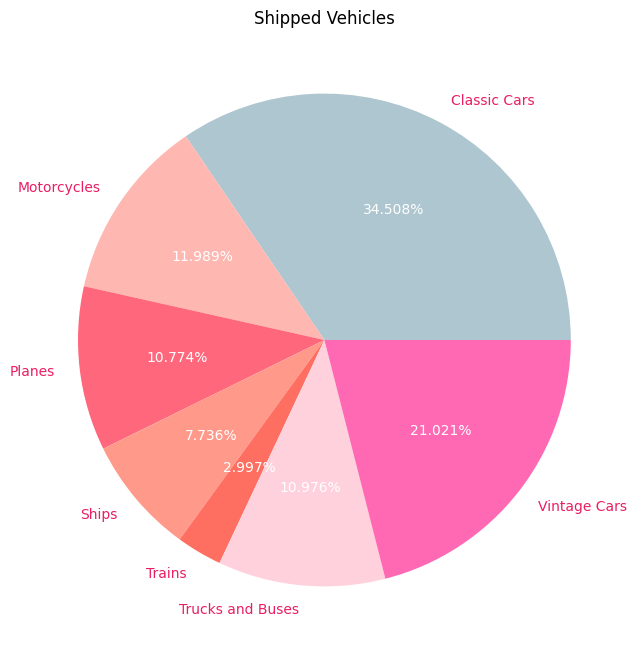

In [28]:
ShippedDF=df3[df3['STATUS']=='Shipped']
plt.figure(figsize=(8,8))
plt.pie(ShippedDF['Number'],labels=ShippedDF['PRODUCTLINE'],autopct='%1.3f%%',colors = ['#AEC6CF', '#FFB7B2', '#FF677D', '#FF9A8B', '#FF6F61', '#FFD1DC', '#FF69B4']
,textprops={'color': '#E91E63'}
)
plt.title("Shipped Vehicles")
for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_color('white') 
plt.show()

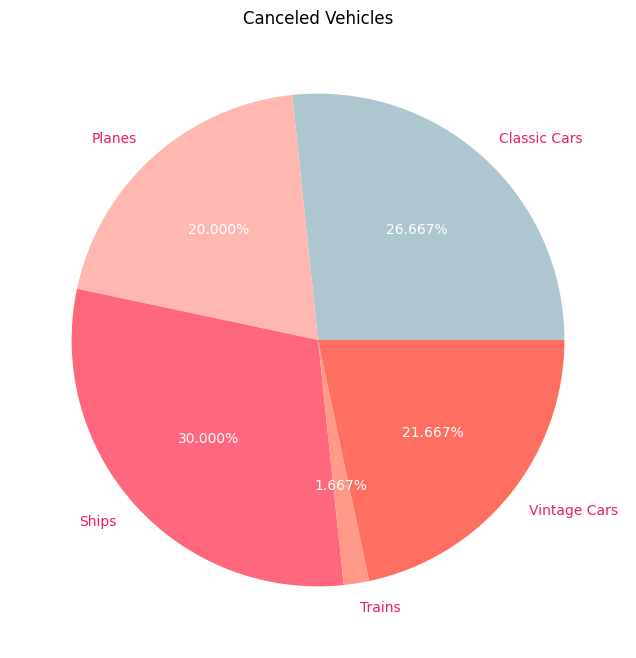

In [29]:
canceledDF = df3[df3['STATUS'] == 'Cancelled']

canceledDF=canceledDF[canceledDF['Number']>0]
plt.figure(figsize=(8,8))
plt.pie(canceledDF['Number'], labels=canceledDF['PRODUCTLINE'], autopct='%1.3f%%',colors = ['#AEC6CF', '#FFB7B2', '#FF677D', '#FF9A8B', '#FF6F61'],textprops={'color': '#E91E63'}
)
plt.title("Canceled Vehicles")
for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_color('white') 
plt.show()


In [30]:
pivot=pd.pivot_table(
df3,
values='Number',
columns='STATUS',
index='PRODUCTLINE').astype(int)
pivot


C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\1274559931.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot=pd.pivot_table(


STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
PRODUCTLINE,,,,,,
Classic Cars,16,1,13,12,8,852
Motorcycles,0,5,0,1,0,296
Planes,12,2,0,9,12,266
Ships,18,1,0,8,12,191
Trains,1,0,0,1,0,74
Trucks and Buses,0,0,10,4,5,271
Vintage Cars,13,2,16,8,9,519


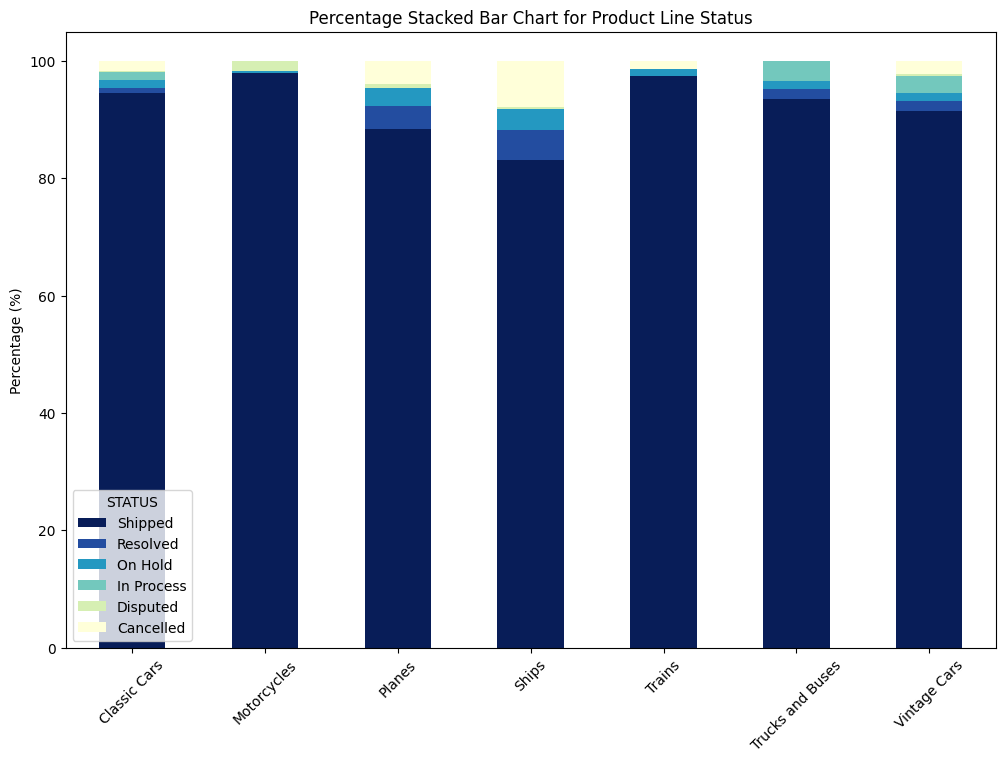

In [32]:
percentage_df = pivot.div(pivot.sum(axis=1), axis=0) * 100

percentage_df = percentage_df[percentage_df.columns[::-1]]

percentage_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='YlGnBu_r')  

plt.title('Percentage Stacked Bar Chart for Product Line Status')
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


In [54]:
df4 = df.groupby(['COUNTRY', 'DEALSIZE']).agg( {
    'DEALSIZE':'count',
}
).rename(
    columns={
        'DEALSIZE':'Number'
        }
    
).reset_index()
df4['Total Deals']=df4.groupby('COUNTRY')['Number'].transform('sum')
df4=df4.sort_values(by=['Total Deals'],ascending=[False])

df4
df4dropped=df4.drop(['Total Deals'],axis=1)
df4dropped

C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\4184705278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = df.groupby(['COUNTRY', 'DEALSIZE']).agg( {


,COUNTRY,DEALSIZE,Number
54,USA,Large,32
55,USA,Medium,470
56,USA,Small,399
42,Spain,Large,9
43,Spain,Medium,171
44,Spain,Small,154
18,France,Large,8
20,France,Small,144
19,France,Medium,149
2,Australia,Small,92


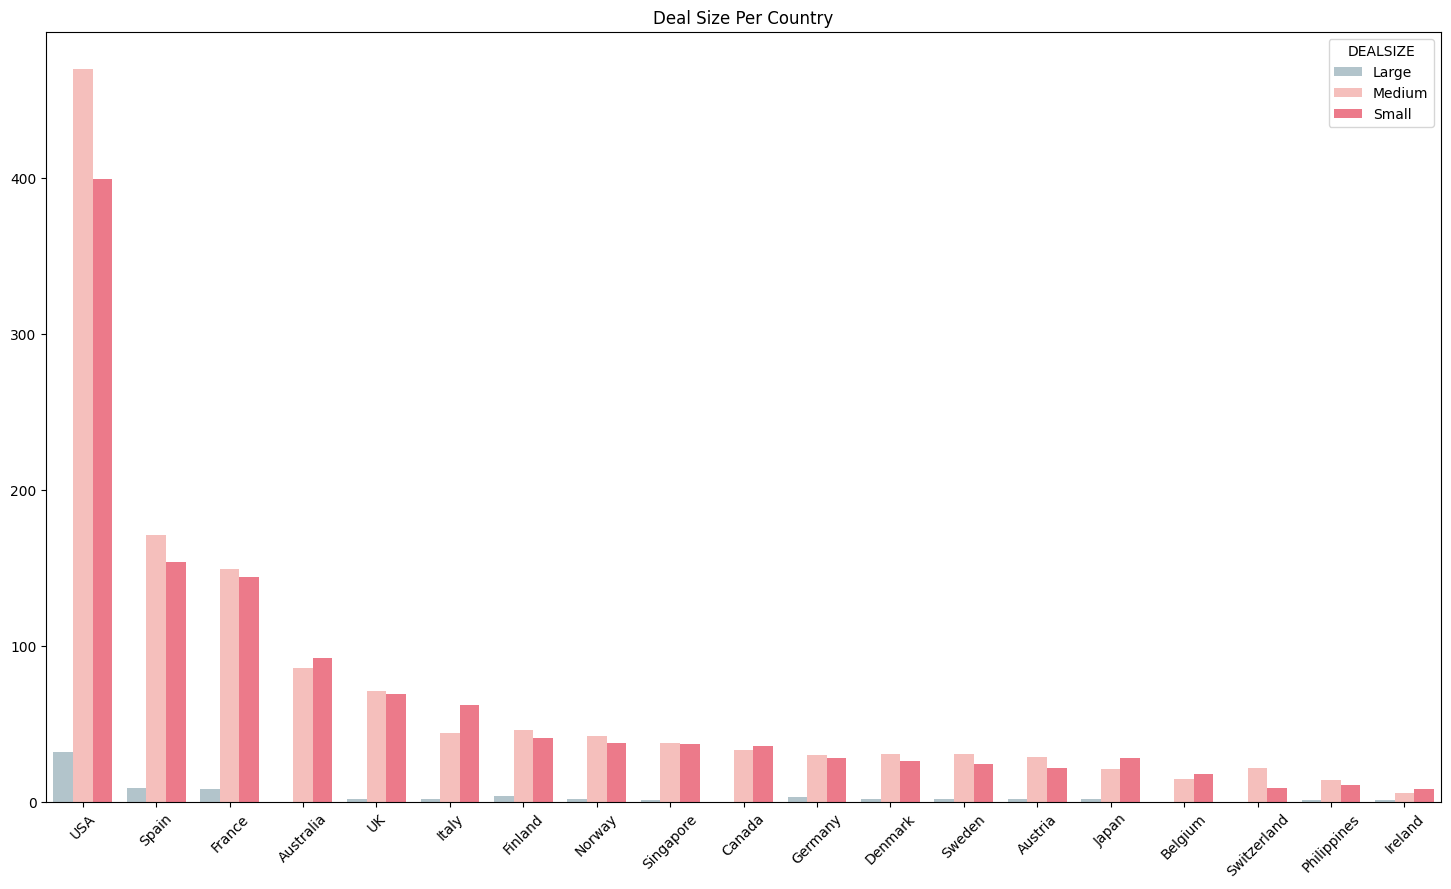

In [34]:
plt.figure(figsize=(18,10))
sns.barplot(x='COUNTRY',y='Number',hue='DEALSIZE',data=df4dropped,palette=['#AEC6CF', '#FFB7B2', '#FF677D'])
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Deal Size Per Country')
plt.show()

In [35]:
df5=df[['ORDERDATE','SALES']]
df5['Year']=df['ORDERDATE'].dt.year
df5=df5.groupby('Year').agg(
    {
        'SALES':'sum'
    }
).rename(
    columns={
        'SALES':'Total Sales'
    }
).reset_index()
df5

C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\1430526482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Year']=df['ORDERDATE'].dt.year


,Year,Total Sales
0,2018,3142926.57
1,2019,4397986.50
2,2020,1496395.40


C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\780940304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Total Sales',data=df5,palette='Blues')


Text(0.5, 1.0, 'Total Money Spent Per Year')

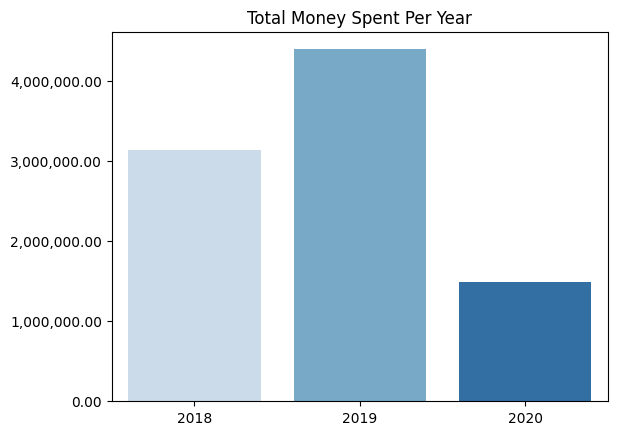

In [36]:
sns.barplot(x='Year',y='Total Sales',data=df5,palette='Blues')
formatter = FuncFormatter(lambda x, _: f'{x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Money Spent Per Year')


C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\998826161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
C:\Users\Taqey\AppData\Local\Temp\ipykernel_10756\998826161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productline_sales.values, y=productline_sales.index, palette="Blues")


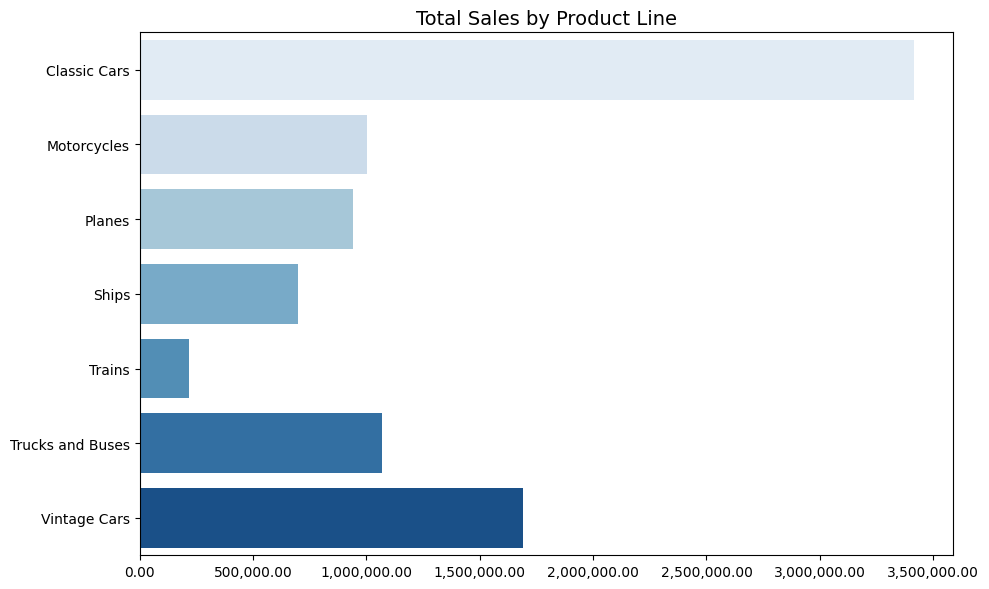

In [77]:
plt.figure(figsize=(10, 6))
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sns.barplot(x=productline_sales.values, y=productline_sales.index, palette="Blues")
formatter = FuncFormatter(lambda x, _: f'{x:,.2f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Total Sales by Product Line', fontsize=14)
plt.xlabel('',)
plt.ylabel('')
plt.tight_layout()
plt.show()

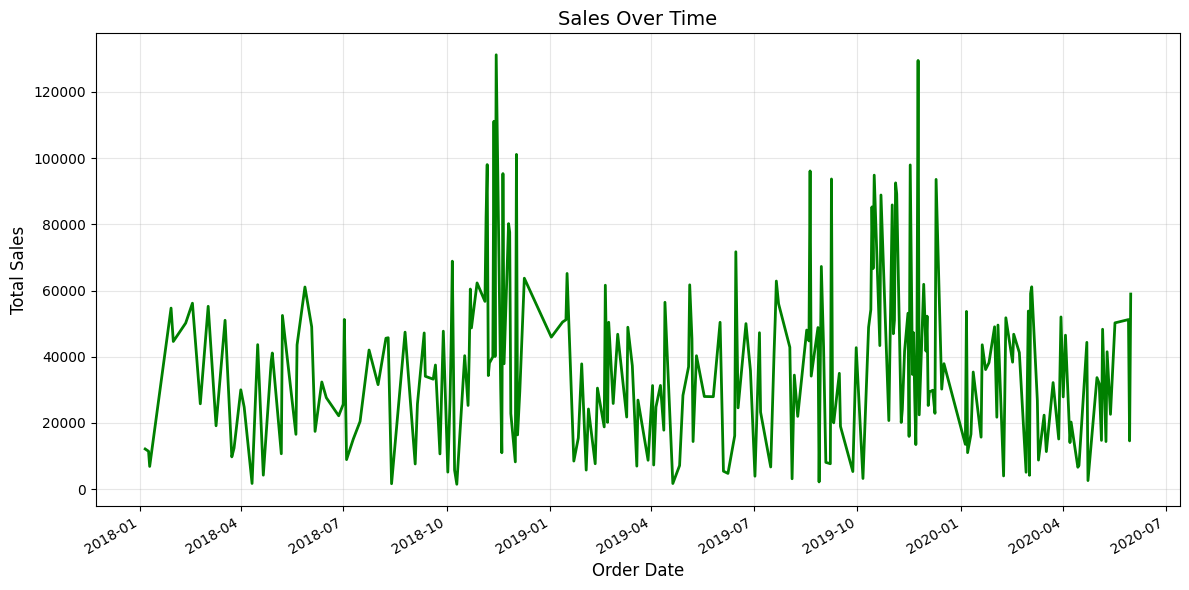

In [85]:
plt.figure(figsize=(12, 6))
sales_over_time = df.groupby('ORDERDATE')['SALES'].sum()
sales_over_time.plot(color='g', linewidth=2)
plt.title('Sales Over Time', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

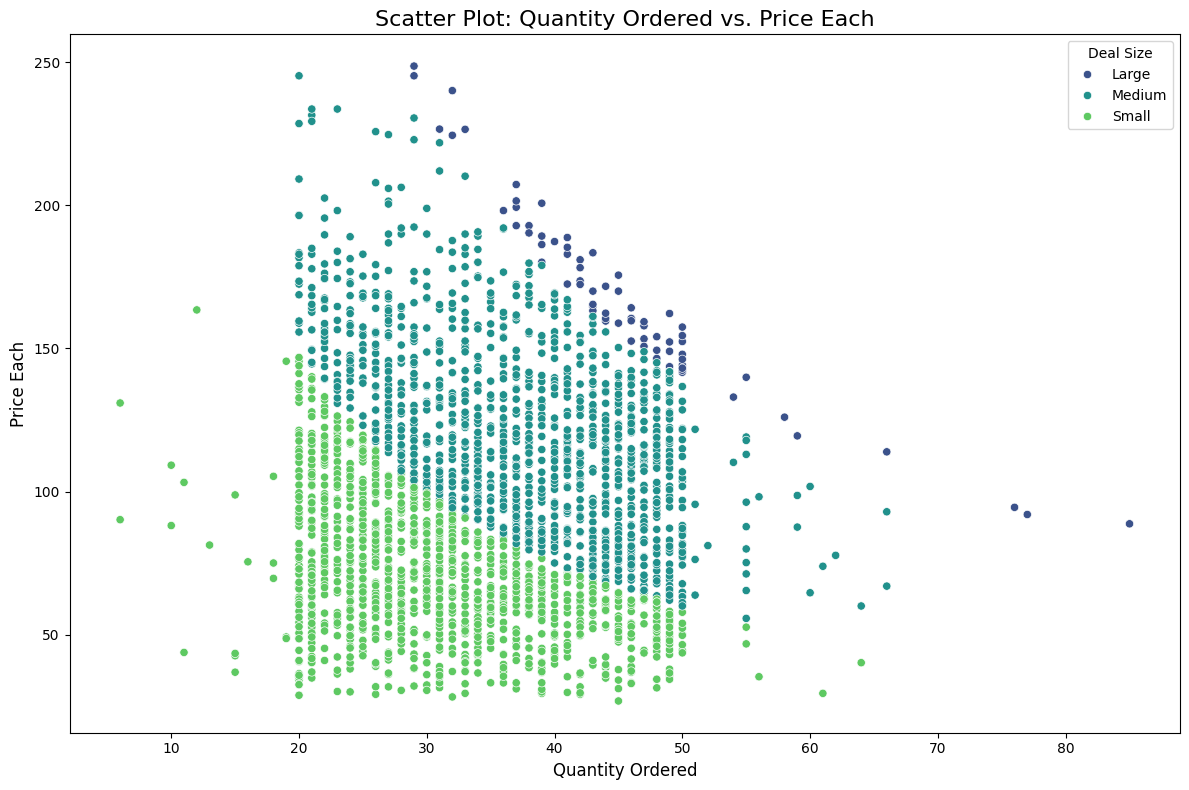

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='QUANTITYORDERED',
    y='PRICEEACH',
    hue='DEALSIZE',
    palette='viridis'
)

plt.title('Scatter Plot: Quantity Ordered vs. Price Each', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Price Each', fontsize=12)
plt.legend(title='Deal Size', fontsize=10)
plt.tight_layout()

plt.show()